In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Reading the data file
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv("car.data", names=column_names)

In [ ]:
car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
car_data.dropna(how="all",axis=1,inplace=True)
car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
car_data.dropna(how="all",axis=0,inplace=True)
car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
car_data=car_data.drop_duplicates()
car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
car_data = shuffle(car_data, random_state=42).reset_index(drop=True)

##ZeroR

In [ ]:
category_counts = car_data['class'].value_counts()
category_counts

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [ ]:
#Rule=unacc
accuracy_zeror=((1210)/(1210+384+69+65))*100
accuracy_zeror

70.02314814814815

###Dataset preparation

In [ ]:
# Separate features (X) and labels (y)
X = car_data.drop(columns="class")
y = car_data["class"]

In [ ]:
# Initialize a LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical feature in X
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])  # Transform categorical to numeric
    label_encoders[column] = le  # Store encoder for future decoding if needed

# Apply LabelEncoder to the target (y)
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [ ]:
X

,buying,maint,doors,persons,lug_boot,safety
0,0,0,2,0,1,0
1,2,1,0,1,1,2
2,0,0,3,0,0,2
3,1,0,3,1,1,2
4,2,1,2,2,1,1
...,...,...,...,...,...,...
1723,2,2,1,2,1,0
1724,2,1,3,2,0,2
1725,0,1,3,2,1,0
1726,1,0,2,0,2,2


In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
X=X.to_numpy()

In [ ]:
y

array([2, 0, 2, ..., 0, 2, 0])

In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Calculate split indices
train_end = int(0.7 * len(X))
val_end = int(0.85 * len(X))

# Split the data into train, validation, and test sets
X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

In [ ]:
# Display shapes to verify
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (1209, 6) y_train: (1209,)
X_val: (259, 6) y_val: (259,)
X_test: (260, 6) y_test: (260,)


###OneR

In [ ]:
for value in car_data['buying'].unique():
    print(f"If Buying: {value} , number of outcomes (unacc): {len(car_data[(car_data['buying'] == value) & (car_data['class'] == 'unacc')])}")
    print(f"If Buying: {value} , number of outcomes (acc): {len(car_data[(car_data['buying'] == value) & (car_data['class'] == 'acc')])}")
    print(f"If Buying: {value} , number of outcomes (good): {len(car_data[(car_data['buying'] == value) & (car_data['class'] == 'good')])}")
    print(f"If Buying: {value} , number of outcomes (v-good): {len(car_data[(car_data['buying'] == value) & (car_data['class'] == 'v-good')])}\n")

If Buying: high , number of outcomes (unacc): 324
If Buying: high , number of outcomes (acc): 108
If Buying: high , number of outcomes (good): 0
If Buying: high , number of outcomes (v-good): 0

If Buying: med , number of outcomes (unacc): 268
If Buying: med , number of outcomes (acc): 115
If Buying: med , number of outcomes (good): 23
If Buying: med , number of outcomes (v-good): 0

If Buying: low , number of outcomes (unacc): 258
If Buying: low , number of outcomes (acc): 89
If Buying: low , number of outcomes (good): 46
If Buying: low , number of outcomes (v-good): 0

If Buying: vhigh , number of outcomes (unacc): 360
If Buying: vhigh , number of outcomes (acc): 72
If Buying: vhigh , number of outcomes (good): 0
If Buying: vhigh , number of outcomes (v-good): 0



In [ ]:
acc_buying=(324+268+258+360)/(324+108+268+115+23+258+89+46+360+72)
acc_buying

0.7276007215874924

In [ ]:
for value in car_data['maint'].unique():
    print(f"If Maint: {value} , number of outcomes (unacc): {len(car_data[(car_data['maint'] == value) & (car_data['class'] == 'unacc')] )}")
    print(f"If Maint: {value} , number of outcomes (acc): {len(car_data[(car_data['maint'] == value) & (car_data['class'] == 'acc')] )}")
    print(f"If Maint: {value} , number of outcomes (good): {len(car_data[(car_data['maint'] == value) & (car_data['class'] == 'good')] )}")
    print(f"If Maint: {value} , number of outcomes (v-good): {len(car_data[(car_data['maint'] == value) & (car_data['class'] == 'v-good')] )}\n")


If Maint: high , number of outcomes (unacc): 314
If Maint: high , number of outcomes (acc): 105
If Maint: high , number of outcomes (good): 0
If Maint: high , number of outcomes (v-good): 0

If Maint: low , number of outcomes (unacc): 268
If Maint: low , number of outcomes (acc): 92
If Maint: low , number of outcomes (good): 46
If Maint: low , number of outcomes (v-good): 0

If Maint: vhigh , number of outcomes (unacc): 360
If Maint: vhigh , number of outcomes (acc): 72
If Maint: vhigh , number of outcomes (good): 0
If Maint: vhigh , number of outcomes (v-good): 0

If Maint: med , number of outcomes (unacc): 268
If Maint: med , number of outcomes (acc): 115
If Maint: med , number of outcomes (good): 23
If Maint: med , number of outcomes (v-good): 0



In [ ]:
acc_maint=(314+268+360+268)/(314+105+268+92+46+360+72+268+115+23)
acc_maint

0.7276007215874924

In [ ]:
for value in car_data['lug_boot'].unique():
    print(f"If Lug Boot: {value} , number of outcomes (unacc): {len(car_data[(car_data['lug_boot'] == value) & (car_data['class'] == 'unacc')] )}")
    print(f"If Lug Boot: {value} , number of outcomes (acc): {len(car_data[(car_data['lug_boot'] == value) & (car_data['class'] == 'acc')] )}")
    print(f"If Lug Boot: {value} , number of outcomes (good): {len(car_data[(car_data['lug_boot'] == value) & (car_data['class'] == 'good')] )}")
    print(f"If Lug Boot: {value} , number of outcomes (v-good): {len(car_data[(car_data['lug_boot'] == value) & (car_data['class'] == 'v-good')] )}\n")


If Lug Boot: med , number of outcomes (unacc): 392
If Lug Boot: med , number of outcomes (acc): 135
If Lug Boot: med , number of outcomes (good): 24
If Lug Boot: med , number of outcomes (v-good): 0

If Lug Boot: big , number of outcomes (unacc): 368
If Lug Boot: big , number of outcomes (acc): 144
If Lug Boot: big , number of outcomes (good): 24
If Lug Boot: big , number of outcomes (v-good): 0

If Lug Boot: small , number of outcomes (unacc): 450
If Lug Boot: small , number of outcomes (acc): 105
If Lug Boot: small , number of outcomes (good): 21
If Lug Boot: small , number of outcomes (v-good): 0



In [ ]:
acc_lugboot=(392+368+450)/(392+135+24+368+144+24+450+105+21)
acc_lugboot

0.7276007215874924

In [ ]:
for value in car_data['safety'].unique():
    print(f"If Safety: {value} , number of outcomes (unacc): {len(car_data[(car_data['safety'] == value) & (car_data['class'] == 'unacc')] )}")
    print(f"If Safety: {value} , number of outcomes (acc): {len(car_data[(car_data['safety'] == value) & (car_data['class'] == 'acc')] )}")
    print(f"If Safety: {value} , number of outcomes (good): {len(car_data[(car_data['safety'] == value) & (car_data['class'] == 'good')] )}")
    print(f"If Safety: {value} , number of outcomes (v-good): {len(car_data[(car_data['safety'] == value) & (car_data['class'] == 'v-good')] )}\n")

If Safety: high , number of outcomes (unacc): 277
If Safety: high , number of outcomes (acc): 204
If Safety: high , number of outcomes (good): 30
If Safety: high , number of outcomes (v-good): 0

If Safety: med , number of outcomes (unacc): 357
If Safety: med , number of outcomes (acc): 180
If Safety: med , number of outcomes (good): 39
If Safety: med , number of outcomes (v-good): 0

If Safety: low , number of outcomes (unacc): 576
If Safety: low , number of outcomes (acc): 0
If Safety: low , number of outcomes (good): 0
If Safety: low , number of outcomes (v-good): 0



In [ ]:
acc_safety=(277+357+576)/(277+204+30+357+180+39+576)
acc_safety

0.7276007215874924

###K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Create and train the K-NN classifier
k = 5  # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Accuracy with test set
correct_predictions = np.sum(y_pred == y_test)
total_predictions = y_test.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 89.62%


In [ ]:
def true_positive(test,pred):
  tp_a,tp_b,tp_c,tp_d=0,0,0,0


  for i in range(test.size):
        if test[i] == 0 and pred[i] == 0:
            tp_a += 1
        elif test[i] == 1 and pred[i] == 1:
            tp_b += 1
        elif test[i] == 2 and pred[i] == 2:
            tp_c += 1
        elif test[i] == 3 and pred[i] == 3:
            tp_d += 1




  return tp_a,tp_b,tp_c,tp_d

In [ ]:
tp_a,tp_b,tp_c,tp_d=true_positive(y_test,y_pred)

In [ ]:
def false_positive(test,pred):
  fp_a,fp_b,fp_c,fp_d=0,0,0,0

  for i in range(test.size):
     if(pred[i]==0 and test[i]!=0):
       fp_a+=1
     if(pred[i]==1 and test[i]!=1):
       fp_b+=1
     if(pred[i]==2 and test[i]!=2):
       fp_c+=1
     if(pred[i]==3 and test[i]!=3):
       fp_d+=1


  return fp_a,fp_b,fp_c,fp_d

In [ ]:
fp_a,fp_b,fp_c,fp_d=false_positive(y_test,y_pred)

In [ ]:
def false_negative(test,pred):
  fn_a,fn_b,fn_c,fn_d=0,0,0,0

  for i in range(test.size):
     if(pred[i]!=0 and test[i]==0):
       fn_a+=1
     if(pred[i]!=1 and test[i]==1):
       fn_b+=1
     if(pred[i]!=2 and test[i]==2):
       fn_c+=1
     if(pred[i]!=3 and test[i]==3):
       fn_d+=1



  return fn_a,fn_b,fn_c,fn_d

In [ ]:
fn_a,fn_b,fn_c,fn_d=false_negative(y_test,y_pred)

In [ ]:
def true_negative(test,pred):
  tn_a,tn_b,tn_c,tn_d=0,0,0,0

  for i in range(test.size):
     if(pred[i]!=0 and test[i]!=0):
       tn_a+=1
     if(pred[i]!=1 and test[i]!=1):
       tn_b+=1
     if(pred[i]!=2 and test[i]!=2):
       tn_c+=1
     if(pred[i]!=3 and test[i]!=3):
       tn_d+=1


  return tn_a,tn_b,tn_c,tn_d

In [ ]:
tn_a,tn_b,tn_c,tn_d=true_negative(y_test,y_pred)

In [ ]:
# Construct the OvR confusion matrices for each class
confusion_matrix_a = np.array([[tp_a, fn_a], [fp_a, tn_a]])
confusion_matrix_b = np.array([[tp_b, fn_b], [fp_b, tn_b]])
confusion_matrix_c = np.array([[tp_c, fn_c], [fp_c, tn_c]])
confusion_matrix_d = np.array([[tp_d, fn_d], [fp_d, tn_d]])

In [ ]:
precision_a=tp_a/(tp_a+fp_a)
precision_b=tp_b/(tp_b+fp_b)
precision_c=tp_c/(tp_c+fp_c)
precision_d=tp_d/(tp_d+fp_d)

In [ ]:
avg_precision=(precision_a+precision_b+precision_c+precision_d)/4
avg_precision

0.8689045591280228

In [ ]:
recall_a=tp_a/(tp_a+fn_a)
recall_b=tp_b/(tp_b+fn_b)
recall_c=tp_c/(tp_c+fn_c)
recall_d=tp_d/(tp_d+fn_d)

In [ ]:
avg_recall=(recall_a+recall_b+recall_c+recall_d)/4
avg_recall

0.6913690476190476

In [ ]:
fscore_a=(2*recall_a*precision_a)/(recall_a+precision_a)
fscore_b=(2*recall_b*precision_b)/(recall_b+precision_b)
fscore_c=(2*recall_c*precision_c)/(recall_c+precision_c)
fscore_d=(2*recall_d*precision_d)/(recall_d+precision_d)

In [ ]:
avg_f1_score=(fscore_a+fscore_b+fscore_c+fscore_d)/4
avg_f1_score

0.7433690484987314

##Naive Bayesian

In [ ]:
# training the model on training set
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# Make predictions on the test set
y_pred2 = cnb.predict(X_test)

In [ ]:
print(type(y_test))
print(type(y_pred2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Accuracy with test set
correct_predictions = np.sum(y_pred2 == y_test)
total_predictions = y_test.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.08%


In [ ]:
tp_a1,tp_b1,tp_c1,tp_d1=true_positive(y_test,y_pred2)

In [ ]:
fp_a1,fp_b1,fp_c1,fp_d1=false_positive(y_test,y_pred2)

In [ ]:
fn_a1,fn_b1,fn_c1,fn_d1=false_negative(y_test,y_pred2)

In [ ]:
tn_a1,tn_b1,tn_c1,tn_d1=true_negative(y_test,y_pred2)

In [ ]:
# Construct the OvR confusion matrices for each class
confusion_matrix_a1 = np.array([[tp_a1, fn_a1], [fp_a1, tn_a1]])
confusion_matrix_b1 = np.array([[tp_b1, fn_b1], [fp_b1, tn_b1]])
confusion_matrix_c1 = np.array([[tp_c1, fn_c1], [fp_c1, tn_c1]])
confusion_matrix_d1 = np.array([[tp_d1, fn_d1], [fp_d1, tn_d1]])

In [ ]:
confusion_matrix_b1

array([[  1,  13],
       [  0, 246]])

In [ ]:
precision_a1=tp_a1/(tp_a1+fp_a1)
precision_b1=tp_b1/(tp_b1+fp_b1)
precision_c1=tp_c1/(tp_c1+fp_c1)
precision_d1=tp_d1/(tp_d1+fp_d1)

In [ ]:
avg_precision1=(precision_a1+precision_b1+precision_c1+precision_d1)/4
avg_precision1

0.8869210299194477

In [ ]:
recall_a1=tp_a1/(tp_a1+fn_a1)
recall_b1=tp_b1/(tp_b1+fn_b1)
recall_c1=tp_c1/(tp_c1+fn_c1)
recall_d1=tp_d1/(tp_d1+fn_d1)

In [ ]:
avg_recall1=(recall_a1+recall_b1+recall_c1+recall_d1)/4
avg_recall1

0.5266712454212454

In [ ]:
fscore_a1=(2*recall_a1*precision_a1)/(recall_a1+precision_a1)
fscore_b1=(2*recall_b1*precision_b1)/(recall_b1+precision_b1)
fscore_c1=(2*recall_c1*precision_c1)/(recall_c1+precision_c1)
fscore_d1=(2*recall_d1*precision_d1)/(recall_d1+precision_d1)

In [ ]:
avg_f1_score1=(fscore_a1+fscore_b1+fscore_c1+fscore_d1)/4
avg_f1_score1

0.5586031311749506

##SVM

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

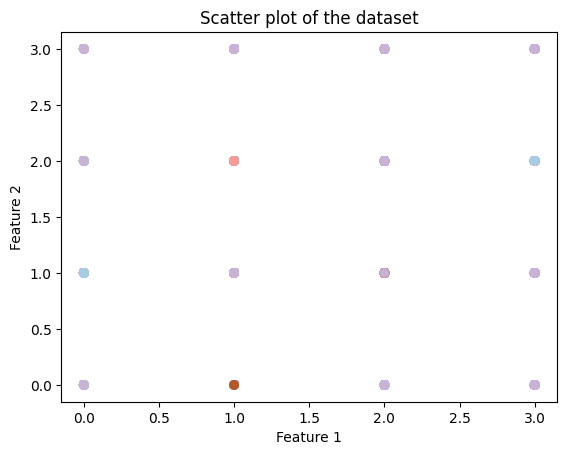

In [ ]:
import matplotlib.pyplot as plt

# Example: assuming X_train and y_train are your features and target
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the dataset')
plt.show()


In [ ]:
# Create an SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict and evaluate the model
y_predd = svm_linear.predict(X_test)
# accuracy_linear = accuracy_score(y_test, y_pred)
# print(f"Accuracy with linear kernel: {accuracy_linear}")

In [ ]:
# Accuracy with test set
correct_predictions = np.sum(y_predd == y_test)
total_predictions = y_test.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 69.62%


In [ ]:
# Create an SVM model with a non-linear kernel (e.g., RBF kernel)
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_svm = svm_rbf.predict(X_test)
# accuracy_rbf = accuracy_score(y_test, y_pred_svm)
# print(f"Accuracy with RBF kernel: {accuracy_rbf}")


In [ ]:
print(type(y_test))
print(type(y_pred_svm))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Accuracy with test set
correct_predictions = np.sum(y_pred_svm == y_test)
total_predictions = y_test.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.46%


In [ ]:
tp_a2,tp_b2,tp_c2,tp_d2=true_positive(y_test,y_pred_svm)

In [ ]:
fp_a2,fp_b2,fp_c2,fp_d2=false_positive(y_test,y_pred_svm)

In [ ]:
fn_a2,fn_b2,fn_c2,fn_d2=false_negative(y_test,y_pred_svm)

In [ ]:
tn_a2,tn_b2,tn_c2,tn_d2=true_negative(y_test,y_pred_svm)

In [ ]:
# Construct the OvR confusion matrices for each class
confusion_matrix_a2 = np.array([[tp_a2, fn_a2], [fp_a2, tn_a2]])
confusion_matrix_b2 = np.array([[tp_b2, fn_b2], [fp_b2, tn_b2]])
confusion_matrix_c2 = np.array([[tp_c2, fn_c2], [fp_c2, tn_c2]])
confusion_matrix_d2 = np.array([[tp_d2, fn_d2], [fp_d2, tn_d2]])

In [ ]:
confusion_matrix_a2

array([[ 53,  12],
       [ 18, 177]])

In [ ]:
precision_a2=tp_a2/(tp_a2+fp_a2)
precision_b2=tp_b2/(tp_b2+fp_b2)
precision_c2=tp_c2/(tp_c2+fp_c2)
precision_d2=tp_d2/(tp_d2+fp_d2)

In [ ]:
avg_precision2=(precision_a2+precision_b2+precision_c2+precision_d2)/4
avg_precision2

0.9196705657674862

In [ ]:
recall_a2=tp_a2/(tp_a2+fn_a2)
recall_b2=tp_b2/(tp_b2+fn_b2)
recall_c2=tp_c2/(tp_c2+fn_c2)
recall_d2=tp_d2/(tp_d2+fn_d2)

In [ ]:
avg_recall2=(recall_a2+recall_b2+recall_c2+recall_d2)/4
avg_recall2

0.6746565934065935

In [ ]:
fscore_a2=(2*recall_a2*precision_a2)/(recall_a2+precision_a2)
fscore_b2=(2*recall_b2*precision_b2)/(recall_b2+precision_b2)
fscore_c2=(2*recall_c2*precision_c2)/(recall_c2+precision_c2)
fscore_d2=(2*recall_d2*precision_d2)/(recall_d2+precision_d2)

In [ ]:
avg_f1_score2=(fscore_a2+fscore_b2+fscore_c2+fscore_d2)/4
avg_f1_score2

0.7355706775463808